In [19]:
import tifffile
import numpy as np
import h5py
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Creating the Training Image Database

We create the training image database by extracting sub-volumes from a the original large images at a specific overlap.

### Loading the training image

In [21]:
#You have to have unzipped the tif image first.
img = tifffile.imread("/home/dysljxjsq/桌面/PorousMediaGan-master/data/berea/berea.tif")
print(img.shape)

(400, 400, 400)


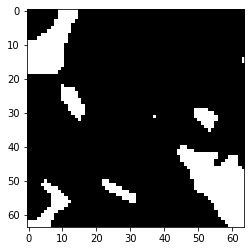

In [22]:
#Let's plot the typical image size so we can get an idea how big the images will be.
plt.imshow(img[50, 0:64, 0:64], cmap="Greys")

In [23]:
count = 0

edge_length = 96 #image dimensions
stride = 32 #stride at which images are extracted

N = edge_length
M = edge_length
O = edge_length

I_inc = stride
J_inc = stride
K_inc = stride

#Have to have this directory to create dataset
target_direc = "../../../data/berea/training_images/berea_"
for i in range(0, img.shape[0], I_inc):
    for j in range(0, img.shape[1], J_inc):
        for k in range(0, img.shape[2], K_inc):
            subset = img[i : i+N, j : j+M, k : k+O]
            if subset.shape == (N, M, O):
                f = h5py.File(target_direc+str(count)+".hdf5", "w")
                f.create_dataset('data', data=subset, dtype="i8", compression="gzip")
                f.close()
                count += 1
print(count)
#hdf5

1000


In [ ]:
import os
from PIL import Image
 
filename = os.listdir("D:\\Work\\process\\样本处理\\polyu-all-train")
base_dir = "D:\\Work\\process\\样本处理\\polyu-all-train\\"
new_dir  = "D:\\Work\\process\\样本处理\\polyu\\"
size_m = 128
size_n = 128
 
for img in filename:
    image = Image.open(base_dir + img)
    image_size = image.resize((size_m, size_n),Image.ANTIALIAS)
    image_size.save(new_dir+ img)
